# Convex Hull Visualization Walkthrough
## 13520075 - Samuel Christopher Swandi

### Prerequisite

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import datasets
import matplotlib.pyplot as plt

### Choose dataset

In [14]:
listDataset = [["iris", datasets.load_iris()], ["digits", datasets.load_digits()], ["wine", datasets.load_wine()], ["breast cancer", datasets.load_breast_cancer()]]


print("Pililah dataset yang akan digunakan untuk visualisasi data: ")
for i in range(len(listDataset)):
    print(f"{i+1} : {listDataset[i][0]}")

choice = int(input("Choose your dataset: "))

while choice > len(listDataset) or choice < 1:
    print("please choose your dataset correctly")
    choice = int(input("Choose your dataset: "))

print("You have selected dataset:", listDataset[choice-1][0])

data = listDataset[choice-1][1]
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)

Pililah dataset yang akan digunakan untuk visualisasi data: 
1 : iris
2 : digits
3 : wine
4 : breast cancer
You have selected dataset: wine


### Choose column to be classified to E^2 Plane

In [15]:
print("Choose two columns to be classified:")
for i,v in enumerate(df.columns[0:len(df.columns)-1]):
    print(f"{i+1} : {v}")

firstColumnChoice = int(input("Choose first column: "))

while firstColumnChoice > len(df.columns)-1 or firstColumnChoice < 1:
    print("please choose your first column correctly")
    firstColumnChoice = int(input("Choose first column: "))

secondColumnChoice = int(input("Choose second column: "))

while secondColumnChoice > len(df.columns)-1 or secondColumnChoice < 1 or secondColumnChoice == firstColumnChoice:
    print("please choose your second column correctly")
    secondColumnChoice = int(input("Choose second column: "))

print("You have chosen first column:", df.columns[firstColumnChoice-1], "and second column:", df.columns[secondColumnChoice-1])


Choose two columns to be classified:
1 : alcohol
2 : malic_acid
3 : ash
4 : alcalinity_of_ash
5 : magnesium
6 : total_phenols
7 : flavanoids
8 : nonflavanoid_phenols
9 : proanthocyanins
10 : color_intensity
11 : hue
12 : od280/od315_of_diluted_wines
13 : proline
You have chosen first column: alcohol and second column: magnesium


## Convex Hull Algorithm Implementation

#### Helper Function

In [16]:
# mencari titik terjauh dari line, dengan tipe "above" atau "below", yang berarti di atas garis atau di bawah garis
def searchForTheFurthestPointOf(type, line, points):
    
    # index titik terjauh pada points(2d array yang berisi kumpulan semua data)
    furthestPoint = 0

    # menghitung jarak terjauh dari titik ke garis
    furthestDistance = -9999999

    # untuk memenuhi parameter yang dibutuhkan oleh fungsi searchForArray
    lines = line

    # untuk mempermudah dalam pencarian x1,x2,y1, dan y2 
    # yang nantinya akan digunakan untuk menghitung jarak terjauh
    line = [points[line[0]], points[line[1]]]
    x1 = line[0][0]
    x2 = line[1][0]
    y1 = line[0][1]
    y2 = line[1][1]
    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2

    if type == "Above":
        # mencari seluruh titik yang berada di atas garis
        arrayAbove = searchForArray("Above", lines, points)

        # jika tidak ada titik yang berada di atas garis, maka return None
        if arrayAbove == []:
            return None

        # jika ada, maka mencari titik dengan jarak terjauh dari garis
        for i in arrayAbove:
            x = points[i][0]
            y = points[i][1]
            distance = abs(a*x + b*y + c) / math.sqrt(a**2 + b**2)
            if distance > furthestDistance:
                furthestDistance = distance
                furthestPoint = i

    if type == "Below":
        # mencari seluruh titik yang berada di bawah garis
        arrayBelow = searchForArray("Below", lines, points)

        # jika tidak ada titik yang berada di bawah garis, maka return None
        if arrayBelow == []:
            return None

        # jika ada, maka mencari titik dengan jarak terjauh dari garis
        for i in arrayBelow:
            x = points[i][0]
            y = points[i][1]
            distance = abs(a*x + b*y + c) / math.sqrt(a**2 + b**2)
            if distance > furthestDistance:
                furthestDistance = distance
                furthestPoint = i

    return furthestPoint


# mencari orientasi sebuah titik dengan garis
def orientation(p,q,r):
    # jika > 0, titik tersebut di atas garis
    # jika < 0, titik tersebut di bawah garis
    # jika = 0, titik berada pada garis
    # p dan q membentuk sebuah garis dan r merupakan titik yang akan di cek
    x1 = p[0]
    x2 = q[0]
    x3 = r[0]
    y1 = p[1]
    y2 = q[1]
    y3 = r[1]
    return math.ceil(x1*y2 + x3*y1 + x2*y3 - x3*y2 - x1*y3 - x2*y1)


# mencari seluruh titik yang berada di atas garis
# sesuai dengan tipe "above" atau "below"
def searchForArray(type, line, points):
    ans = []
    if type == "Above":
        for i in range(len(points)):
            # mengecek apakah titik tersebut merupakan garisnya
            if (i != line[0] and i != line[1]):
                # jika titik tersebut ada di atas garis, maka akan di append ke array anser
                if orientation(points[line[0]], points[line[1]], points[i]) > 0:
                    ans.append(i)

    if type == "Below":
        for i in range(len(points)):
            # mengecek apakah titik tersebut merupakan garisnya
            if (i != line[0] and i != line[1]):
                # jika titik tersebut ada di bawah garis, maka akan di append ke array anser
                if orientation(points[line[0]], points[line[1]], points[i]) <= 0:
                    ans.append(i)

    return ans

#### Main divide and conquer algorithm

In [17]:


# rekursi convexhull
def dnqConvexHull(points, leftmost, rightmost, flag):
    # list of hull points
    hull = []

    # garis yang terbuat dari titik paling kiri dan kanan dari set of points yang diberikan
    line = [leftmost, rightmost]

    # untuk menentukan orientasi points yang ingin dipilih
    # apakah di atas atau di bawah garis
    # flag == True berrarti di atas garis

    if flag:
        # mencari titik terjauh di atas garis
        furthestPointAbove = searchForTheFurthestPointOf("Above", line, points)

        # jika tidak ada titik terjauh di atas garis, maka return titik paling kiri dan paling kanan pembentuk garis
        if furthestPointAbove == None:
            return [leftmost, rightmost]

        # return convexhull dari titik kiri pembuat garis dan titik terjauh dari garis dan
        # titik terjauh di atas garis dan titik kanan dari pembuat garis
        return dnqConvexHull(points, leftmost, furthestPointAbove, True) + dnqConvexHull(points, furthestPointAbove, rightmost, True)

    else :
        # mencari titik terjauh di atas garis
        furthestPointBelow = searchForTheFurthestPointOf("Below", line, points)

        # jika tidak ada titik terjauh di bawah garis, maka return titik paling kiri dan paling kanan pembentuk garis
        if furthestPointBelow == None:
            return [leftmost,rightmost]

        # return convexhull dari titik kiri pembuat garis dan titik terjauh dari garis dan
        # titik terjauh di atas garis dan titik kanan dari pembuat garis
        return dnqConvexHull(points, leftmost, furthestPointBelow, False) + dnqConvexHull(points, furthestPointBelow, rightmost, False)

    # menambahkan hasil kedalam hull untuk di return
    hull.append(leftmost)
    hull.append(rightmost)
    return hull


def myConvexHull(points):
    hull = []
    mn = [float('inf'),0]
    mx = [-999999,0]

    # mencari titik paling kiri dan kanan yang nantinya akan digunakan untuk menjadi garis
    # yang akan dimanfaatkan untuk titik2 yang berada di atas dan di bawah garis
    leftmost = 0
    rightmost = 0
    for i in range(len(buckets)):
        if buckets[i][0] < mn[0]:
            mn[0] = buckets[i][0]
            mn[1] = buckets[i][1]
            leftmost = i
        if buckets[i][0] > mx[0]:
            mx[0] = buckets[i][0]
            mx[1] = buckets[i][1]
            rightmost = i
    
    # mencari seluruh convexhull yang berada di atas garis yang dibuat oleh leftmost dan rightmost
    up = dnqConvexHull(points, leftmost, rightmost, True)

    # mencari seluruh convexhull yang berada di bawah garis yang dibuat oleh leftmost dan rightmost
    down = dnqConvexHull(points, leftmost, rightmost, False)

    # keduanya akan ditambahkan kedalam hull dan akan di return
    # mengapa down harus dibalik?
    # karena orientasi dari down adalah kiri ke kanan, dan orientasi dari up adalam kiri ke kanan juga
    # maka akan terjadi kesalahan yaitu terhubungnya titik terjauh paling kiri dan titik terjauh paling kanan
    # misal:
    # up -> kanan ke kiri -> mencapai ujung kanan convexhull
    # down -> kanan ke kiri -> mencapai ujung kanan convexhull
    # karena up dan down dihubungkan saat up mencapai ujung kanan dan down ada di ujung kiri, maka akan ada garis yang menghubungkan 
    # ujung kanan dan ujung kiri convexhull

    # maka down haruslah diputar agar sesuai orientasi yaitu 
    # up -> kanan ke kiri -> mencapai ujung kanan convexhull 
    # down -> kiri ke kanan -> kembali lagi ke ujung kiri convexhull
    # sehingga orientasi yang terjadi benar
    hull = up + down[::-1]
    return hull


## Main visualization program

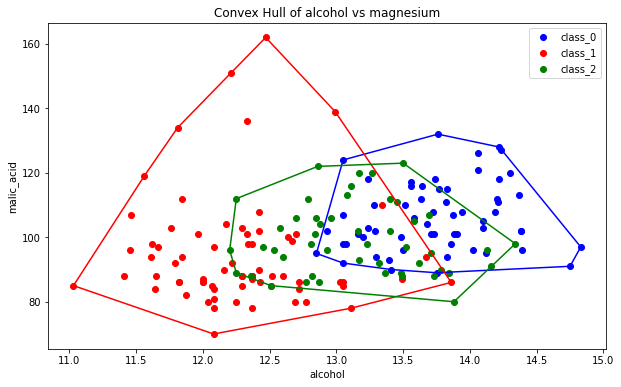

In [18]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g','c','m','y','k']
plt.title(f"Convex Hull of {df.columns[firstColumnChoice-1]} vs {df.columns[secondColumnChoice-1]}")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for j in range(len(data.target_names)):
    bucket = df[df['Target'] == j]
    buckets = bucket.iloc[:,[firstColumnChoice-1,secondColumnChoice-1]].values
    plt.scatter(buckets[:,0], buckets[:,1], label = data.target_names[j], color = colors[j])
    hull = list(myConvexHull(buckets))
    for i in range(len(hull)-1):
        x = [buckets[hull[i]][0], buckets[hull[i+1]][0]]
        y = [buckets[hull[i]][1], buckets[hull[i+1]][1]]
        plt.plot(x, y, colors[j])
plt.legend()